In [1]:
#imgaug 0.2.6 
import imgaug
imgaug.__version__

'0.2.6'

In [2]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [3]:
# import tensorflow as tf
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
# print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [6]:
!nvidia-smi

Tue Feb  2 13:48:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro K2200        Off  | 00000000:03:00.0 Off |                  N/A |
| 42%   41C    P0     1W /  39W |     54MiB /  4041MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
from vesicle import NucleusConfig, train, NucleusDataset
from mrcnn import model as modellib

Using TensorFlow backend.


In [8]:
# Directory to save logs and trained model
ROOT_DIR = os.path.abspath("")
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
dataset_dir = '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/'
print(DEFAULT_LOGS_DIR)

/allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs



## Configurations

In [9]:
# load ves_dataset
config = NucleusConfig()
dataset = NucleusDataset()
dataset.load_nucleus(dataset_dir, "mit_train")
# dataset.load_nucleus(dataset_dir, "train250")
# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 386
Classes: ['BG', 'vesicles', 'mitochondria']


37


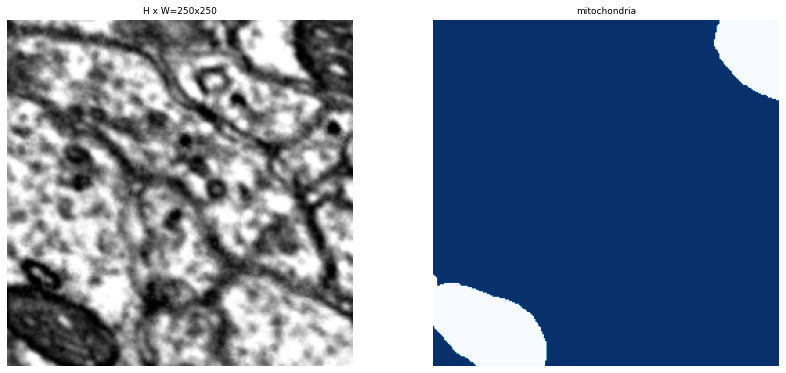

290


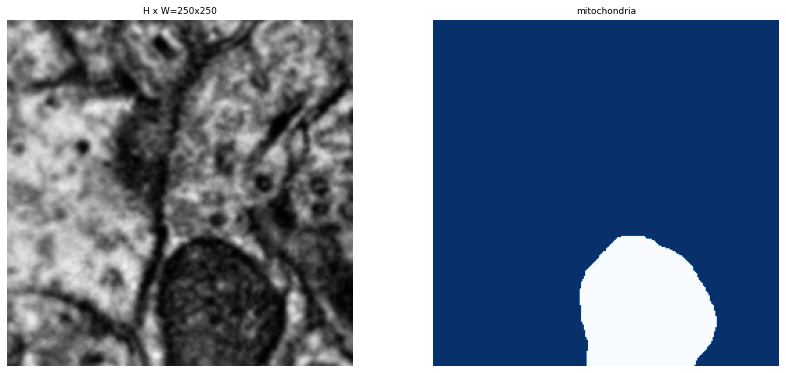

221


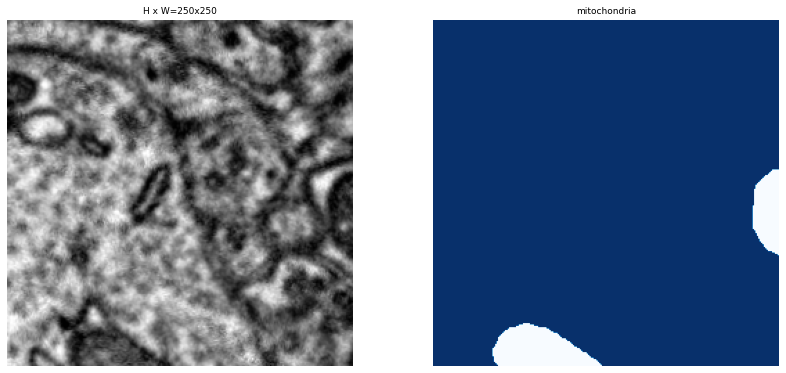

55


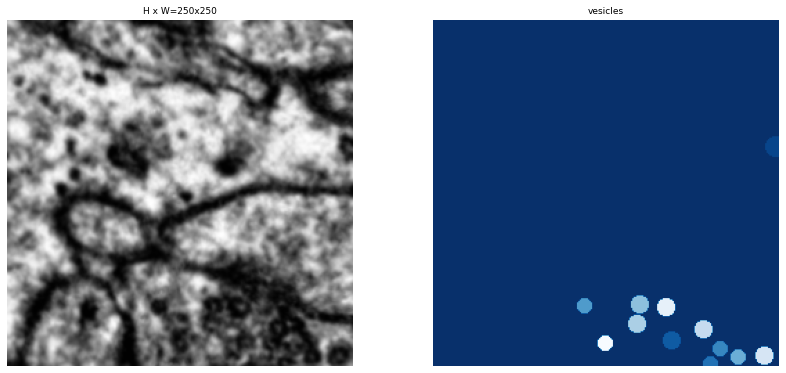

In [10]:
import numpy as np
from mrcnn import visualize
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    print(image_id)
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=1)

In [10]:
model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [11]:
# model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)
weights_path = model.get_imagenet_weights()

In [12]:
weights_path

'/mnt/SSD/home/parastooj/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [13]:
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /mnt/SSD/home/parastooj/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5








In [14]:
DEFAULT_LOGS_DIR

'/allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs'

In [ ]:
dataset_dir = '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/'
train(model, dataset_dir, "mit_train", config)

Train network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: /allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs/vesicle20210202T1348/mask_rcnn_vesicle_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_cl

/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/20
499/500 [============================>.] - ETA: 1s - loss: 2.4547 - rpn_class_loss: 0.1696 - rpn_bbox_loss: 1.1077 - mrcnn_class_loss: 0.2224 - mrcnn_bbox_loss: 0.4017 - mrcnn_mask_loss: 0.5533

/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



500/500 [==============================] - 843s 2s/step - loss: 2.4528 - rpn_class_loss: 0.1695 - rpn_bbox_loss: 1.1066 - mrcnn_class_loss: 0.2223 - mrcnn_bbox_loss: 0.4014 - mrcnn_mask_loss: 0.5530 - val_loss: 2.1652 - val_rpn_class_loss: 0.1154 - val_rpn_bbox_loss: 0.9737 - val_mrcnn_class_loss: 0.2389 - val_mrcnn_bbox_loss: 0.3687 - val_mrcnn_mask_loss: 0.4686
Epoch 2/20
363/500 [====================>.........] - ETA: 3:30 - loss: 1.8927 - rpn_class_loss: 0.1209 - rpn_bbox_loss: 0.8502 - mrcnn_class_loss: 0.2212 - mrcnn_bbox_loss: 0.2710 - mrcnn_mask_loss: 0.4294

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

# %tensorboard --logdir {DEFAULT_LOGS_DIR} --port 5003

In [1]:
!pip install Keras==2.2.4

     |################################| 312 kB 17.5 MB/s eta 0:00:01
  Attempting uninstall: Keras
    Found existing installation: Keras 2.1.0
    Uninstalling Keras-2.1.0:
      Successfully uninstalled Keras-2.1.0


In [ ]:
# !pip install Keras==2.2.4
# This fixed the delay in starting the first epoch
# !pip install Keras==2.1.0

In [ ]:
# !pip install -U scikit-image==0.16.2

In [5]:
!pip install Keras== 2.1.3

ERROR: Could not find a version that satisfies the requirement Keras== (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3)
ERROR: No matching distribution found for Keras==


In [6]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 185 kB/s  eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [12]:
!pip install python3.7

ERROR: Could not find a version that satisfies the requirement python3.7 (from versions: none)
ERROR: No matching distribution found for python3.7


In [5]:
!conda remove tensorflow

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /pipeline/anaconda/envs/tf20gpu

  removed specs: 
    - tensorflow


The following packages will be REMOVED:

    keras:          2.3.1-0                 
    tensorflow:     2.1.0-gpu_py37h7a4bb67_0
    tensorflow-gpu: 2.1.0-h0d30ee6_0        

Proceed ([y]/n)? ^C

CondaSystemExit: 

